# Лабораторная работа №1
## Выполнили: Дробот Елизавета и Рогозян Анастасия.

In [256]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
import config as cfg

# EDA

In [257]:
raw_path = "../data/raw/"
train = pd.read_csv(os.path.join(raw_path, 'train.csv'))
test = pd.read_csv(os.path.join(raw_path, 'test.csv'))

In [258]:
TARGET_COLS = ['Артериальная гипертензия', 'ОНМК', 'Стенокардия, ИБС, инфаркт миокарда', 'Сердечная недостаточность', 'Прочие заболевания сердца']
ID_COL = 'ID'
EDU_COL = 'Образование'
SEX_COL = 'Пол'
CAT_COLS = [
    'Пол', 'Семья', 'Этнос', 'Национальность', 'Религия', 'Образование', 
    'Профессия', 'Статус Курения', 'Частота пасс кур', 'Алкоголь',
    'Время засыпания', 'Время пробуждения'
]
OHE_COLS = [
    'Пол', 'Вы работаете?', 'Выход на пенсию', 'Прекращение работы по болезни', 'Сахарный диабет', 'Гепатит',
    'Онкология', 'Хроническое заболевание легких', 'Бронжиальная астма', 'Туберкулез легких ', 'ВИЧ/СПИД',
    'Регулярный прим лекарственных средств', 'Травмы за год', 'Переломы','Пассивное курение', 'Сон после обеда', 
    'Спорт, клубы', 'Религия, клубы'
]
REAL_COLS = ['Возраст курения', 'Сигарет в день', 'Возраст алког']

In [259]:
def set_idx(df: pd.DataFrame, idx_col: str) -> pd.DataFrame:
    df = df.set_index(idx_col)
    return df

In [260]:
#train = train.set_index(ID_COL)
#test = test.set_index(ID_COL)

In [261]:
train, target = train.drop(TARGET_COLS, axis=1), train[TARGET_COLS]

In [262]:
def drop_unnecesary_id(df: pd.DataFrame) -> pd.DataFrame:
    if 'ID_y' in df.columns:
        df = df.drop('ID_y', axis=1)
    return df

In [263]:
def add_ord_edu(df: pd.DataFrame) -> pd.DataFrame:
    df[f'{EDU_COL}_ord'] = df[EDU_COL].str.slice(0, 1).astype(np.int8).values
    return df

In [264]:
def fill_sex(df: pd.DataFrame) -> pd.DataFrame:
    most_freq = df[SEX_COL].value_counts().index[0]
    df[SEX_COL] = df[SEX_COL].fillna(most_freq)
    return df

In [265]:
def cast_types(df: pd.DataFrame) -> pd.DataFrame:
    df[CAT_COLS] = df[CAT_COLS].astype('category')

    ohe_int_cols = train[OHE_COLS].select_dtypes('number').columns
    df[ohe_int_cols] = df[ohe_int_cols].astype(np.int8)

    df[REAL_COLS] = df[REAL_COLS].astype(np.float32)
    return df
    

In [266]:
def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    df = set_idx(df, cfg.ID_COL)
    df = drop_unnecesary_id(df)
    df = add_ord_edu(df)
    df = fill_sex(df)
    df = cast_types(df)
    return df

In [267]:
train = train.pipe(preprocess)
test = test.pipe(preprocess)

# MODELING

In [268]:
import os
import pandas as pd
import numpy as np

In [269]:
from sklearn.svm import *
from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.compose import *
from sklearn.pipeline import *
from sklearn.metrics import *
from sklearn.impute import *
from sklearn.multioutput import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.metrics import recall_score, f1_score, roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [270]:
import config as cfg


In [271]:
RS = 77

In [272]:
processed_data_path = '../data/processed/'
if not os.path.exists(processed_data_path): 
    os.makedirs(processed_data_path) 
save_as_pickle(train, os.path.join(processed_data_path, 'train.pkl'))
save_as_pickle(target, os.path.join(processed_data_path, 'target.pkl'))
save_as_pickle(test, os.path.join(processed_data_path, 'test.pkl'))

In [273]:
train[cfg.CAT_COLS] = train[cfg.CAT_COLS].astype('object')

In [274]:
from functools import partial

In [275]:
scoring = partial(fbeta_score, beta=2.0)

In [276]:
train_idx, val_idx = train_test_split(
        train.index, test_size=0.2, random_state=7)

In [277]:
train_idx

Index(['54-501-041-01', '54-101-071-01', '54-102-244-01', '54-601-028-02',
       '54-601-006-01', '54-501-062-01', '54-001-070-02', '54-101-008-02',
       '54-002-111-01', '54-102-053-01',
       ...
       '54-002-004-02', '54-101-065-01', '54-501-038-01', '54-101-044-01',
       '54-103-069-01', '54-102-250-01', '54-701-012-02', '54-102-018-02',
       '54-102-029-01', '54-102-340-01'],
      dtype='object', name='ID', length=764)

In [278]:
val_idx.to_frame().to_pickle('temp.pkl')

In [279]:
import pickle

In [280]:
with open('tmp2.pkl', 'wb') as f:
    pickle.dump(val_idx, f)

In [281]:
with open('tmp2.pkl', 'rb') as f:
    val_idx2 = pickle.load(f)

In [282]:
type(train)

pandas.core.frame.DataFrame

In [283]:
type(val_idx2)

pandas.core.indexes.base.Index

In [284]:
val_idx2

Index(['54-501-020-01', '54-101-047-01', '54-102-300-03', '54-103-046-01',
       '54-602-026-02', '54-002-118-01', '54-501-071-01', '54-501-055-02',
       '54-001-033-01', '54-001-062-01',
       ...
       '54-503-002-01', '54-601-019-02', '54-501-061-01', '54-503-008-01',
       '54-103-053-01', '54-504-003-01', '54-501-035-02', '54-102-159-01',
       '54-103-096-02', '54-701-005-01'],
      dtype='object', name='ID', length=191)

In [285]:
train_data, val_data, train_target, val_target = train_test_split(train, target, train_size=0.8, random_state=RS)

In [286]:
train_data.head()

,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,...,Пассивное курение,Частота пасс кур,Алкоголь,Возраст алког,Время засыпания,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы",Образование_ord
ID,,,,,,,,,,,,,,,,,,,,,
54-103-054-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,1,0,0,...,0,NaN,употребляю в настоящее время,26.0,22:00:00,06:00:00,0,1,0,5
54-102-299-01,Ж,вдовец / вдова,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,1,0,...,0,NaN,никогда не употреблял,NaN,22:30:00,08:30:00,0,1,0,5
54-102-138-01,Ж,никогда не был(а) в браке,европейская,Русские,Христианство,5 - ВУЗ,низкоквалифицированные работники,1,0,0,...,0,NaN,никогда не употреблял,NaN,22:00:00,06:30:00,0,0,0,5
54-601-033-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,4 - профессиональное училище,операторы и монтажники установок и машинного о...,0,1,0,...,0,NaN,употребляю в настоящее время,20.0,22:00:00,07:00:00,0,0,0,4
54-602-054-01,Ж,в разводе,европейская,Русские,Христианство,4 - профессиональное училище,ведение домашнего хозяйства,0,1,0,...,0,NaN,употребляю в настоящее время,18.0,00:00:00,07:00:00,1,0,0,4


In [287]:
train_data.dropna()

,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,...,Пассивное курение,Частота пасс кур,Алкоголь,Возраст алког,Время засыпания,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы",Образование_ord
ID,,,,,,,,,,,,,,,,,,,,,
54-103-092-01,М,в браке в настоящее время,европейская,Русские,Христианство,5 - ВУЗ,"представители законодат. органов власти,...",1,0,0,...,1,1-2 раза в неделю,употребляю в настоящее время,21.0,23:00:00,07:00:00,0,0,0,5
54-504-028-02,Ж,в браке в настоящее время,европейская,Русские,Атеист / агностик,3 - средняя школа / закон.среднее / выше среднего,ремесленники и представители других отраслей п...,0,0,0,...,1,не менее 1 раза в день,употребляю в настоящее время,29.0,01:00:00,04:00:00,0,0,0,3
54-103-046-02,М,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,ремесленники и представители других отраслей п...,0,1,0,...,1,1-2 раза в неделю,употребляю в настоящее время,21.0,22:00:00,06:00:00,0,0,0,3
54-102-339-01,М,в браке в настоящее время,европейская,Русские,Христианство,4 - профессиональное училище,низкоквалифицированные работники,0,1,0,...,1,3-6 раз в неделю,употребляю в настоящее время,25.0,23:00:00,08:00:00,0,0,0,4
54-101-008-02,М,в браке в настоящее время,европейская,Русские,Христианство,5 - ВУЗ,техники и младшие специалисты,1,0,0,...,1,1-2 раза в неделю,употребляю в настоящее время,20.0,22:00:00,09:00:00,0,0,0,5
54-002-154-02,М,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,операторы и монтажники установок и машинного о...,1,0,0,...,1,2-3 раза в день,употребляю в настоящее время,20.0,22:00:00,05:30:00,0,0,0,3
54-103-058-02,М,в браке в настоящее время,европейская,Русские,Атеист / агностик,5 - ВУЗ,дипломированные специалисты,0,1,0,...,1,1-2 раза в неделю,ранее употреблял,25.0,21:30:00,05:30:00,0,0,0,5
54-102-109-01,Ж,в разводе,европейская,Русские,Христианство,4 - профессиональное училище,операторы и монтажники установок и машинного о...,0,1,0,...,1,4 и более раз в день,употребляю в настоящее время,22.0,22:00:00,08:00:00,0,0,0,4
54-502-003-01,М,в браке в настоящее время,европейская,Русские,Христианство,4 - профессиональное училище,дипломированные специалисты,1,0,0,...,1,1-2 раза в неделю,употребляю в настоящее время,20.0,22:00:00,04:00:00,0,0,0,4


In [288]:
real_pipe = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
]
)

In [289]:
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [290]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [291]:
import category_encoders as ce

In [292]:
preprocess_pipe = ColumnTransformer(transformers=[
    ('real_cols', real_pipe, cfg.REAL_COLS),
    ('cat_cols', cat_pipe, cfg.CAT_COLS),
    ('woe_cat_cols', ce.WOEEncoder(), cfg.CAT_COLS),
    ('ohe_cols', 'passthrough', cfg.OHE_COLS)
]
)

In [293]:
model = LinearSVC()

In [294]:
model_pipe = Pipeline([
    ('preprocess', preprocess_pipe),
    ('model', model)
]
)

In [295]:
multiout_model_pipe = MultiOutputClassifier(model_pipe, n_jobs=4)

In [296]:
scores = cross_val_score(
    estimator=multiout_model_pipe,
    X=train_data,
    y=train_target,
    scoring='f1_samples',
    cv=3,
    n_jobs=1
)

F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.


In [297]:
scores

array([0.23738562, 0.21895425, 0.23530184])

После обсуждения, мы решили, что будем использовать recall_score. Стоит подобрать конфигурацию модели под каждое отдельное заболевание и оптимизировать метрики отдельно.Мы решили, что будет использоваться Recall по всем столбцам как основная метрика. 

In [298]:

def recall_common(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return recall_score(y_true, y_pred, average='micro', zero_division=0)

def get_recall_common():
    return make_scorer(score_func=recall_common, greater_is_better=True)

def recall_worst(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return np.min([recall_score(y_true[:, i], y_pred[:, i], zero_division=0) for i in range(y_true.shape[1])])

def get_recall_worst():
    return make_scorer(score_func=worst_recall, greater_is_better=True)

In [299]:
def f1_common(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return f1_score(y_true, y_pred, average='micro')

def roc_auc(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return roc_auc_score(y_true, y_pred, average='micro')

In [300]:
import typing as tp

metrics = [recall_common, recall_worst, f1_common, roc_auc]

def evaluate(y_true: np.ndarray, y_pred: np.ndarray, metrics: tp.List[tp.Callable] = metrics) -> None:
    print(', '.join([f'{i.__name__}={i(y_true, y_pred):.4f}' for i in metrics]))

Мы решили использовать логистическую регрессию

In [301]:
processed_data_path = '../data/processed/'
train = pd.read_pickle(os.path.join(processed_data_path, 'train.pkl'))
target = pd.read_pickle(os.path.join(processed_data_path, 'target.pkl'))

In [302]:
train[cfg.CAT_COLS] = train[cfg.CAT_COLS].astype('object')
train_data, val_data, train_target, val_target = train_test_split(train, target, train_size=0.8, random_state=RS, stratify=target.iloc[:,[1, 2, 3, 4]].sum(axis=1)) 

In [303]:
preprocess_pipe = ColumnTransformer(transformers=[
    ('real_cols', real_pipe, cfg.REAL_COLS),
    ('cat_cols', cat_pipe, cfg.CAT_COLS),
    ('ohe_cols', 'passthrough', cfg.OHE_COLS)
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RS)
for train_index, test_index in skf.split(train, target.sum(axis=1)):
    X_train, X_test = train.iloc[train_index], train.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    logit = MultiOutputClassifier(LogisticRegression(solver='liblinear', random_state=RS))
    logit.fit(preprocess_pipe.fit_transform(X_train), y_train)
    
    y_pred = logit.predict(preprocess_pipe.transform(X_test))
    
    evaluate(y_test.to_numpy(), y_pred)

recall_common=0.3974, recall_worst=0.0000, f1_common=0.4921, roc_auc=0.6774
recall_common=0.4103, recall_worst=0.0000, f1_common=0.4961, roc_auc=0.6813
recall_common=0.4051, recall_worst=0.0000, f1_common=0.4848, roc_auc=0.6762
recall_common=0.3797, recall_worst=0.0000, f1_common=0.4688, roc_auc=0.6660
recall_common=0.4177, recall_worst=0.0000, f1_common=0.5097, roc_auc=0.6869


In [304]:
def draw_coverage(y_true: np.ndarray, y_pred: np.ndarray) -> None:
    dist = pd.DataFrame([val_target.values.sum(axis=0), y_pred.sum(axis=0)], index=['true', 'pred'], columns=target.columns).T
    for col in ['true', 'pred']:
        plt.bar(x=target.columns, height=dist[col],  alpha=0.5, label=col)
    plt.legend()
    plt.suptitle('Кол-во положительных истинных и предсказанных')
    plt.xticks(size=8, rotation=45, ha='right')
    plt.ylabel('Кол-во положительных')
    plt.show()

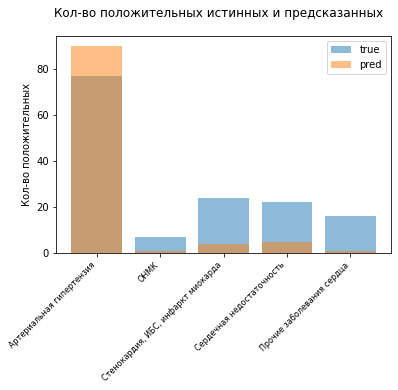

In [305]:
draw_coverage(y_test.to_numpy(), y_pred)

На графике можно увидеть, что распределение неравномерно. Кроме того, артериальная гипертензия почти в два раза больше, чем все остальные. 

In [306]:
parameters = {
    'estimator__fit_intercept': [True, False],
    'estimator__penalty': ['l1', 'l2'],
    'estimator__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

model = MultiOutputClassifier(LogisticRegression(solver='liblinear', random_state=RS, class_weight='balanced', max_iter=500))
clf = GridSearchCV(model, parameters, scoring=get_recall_common(), cv=3)
clf.fit(preprocess_pipe.fit_transform(train), target)
print(clf.best_params_)

{'estimator__C': 0.1, 'estimator__fit_intercept': True, 'estimator__penalty': 'l1'}


In [307]:
def save_model(model, path: str) -> None:
    pickle.dump(model, open(path, 'wb'))
model_path = '../models'
if not os.path.exists(model_path): 
    os.makedirs(model_path) 
train_data_transformed = preprocess_pipe.fit_transform(train_data)
train_target_transformed = preprocess_pipe.transform(val_data)
save_model(preprocess_pipe, os.path.join(model_path, 'preproc.pkl'))

recall_common=0.4178, recall_worst=0.0000, f1_common=0.4919, roc_auc=0.6836


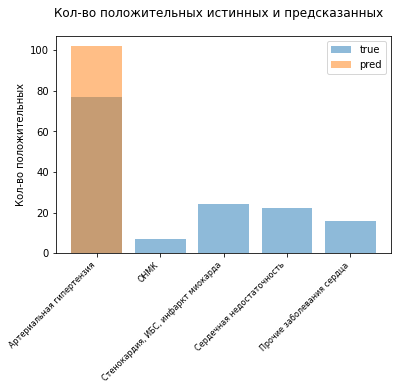

In [308]:
logit = MultiOutputClassifier(LogisticRegression(solver='liblinear', random_state=RS, fit_intercept=True, penalty='l1', C=0.1))

logit.fit(train_data_transformed, train_target)
y_pred = logit.predict(train_target_transformed)

evaluate(val_target.to_numpy(), y_pred)
draw_coverage(val_target.to_numpy(), y_pred)

In [309]:
save_model(logit, os.path.join(model_path, 'logit.pkl'))

recall_common=0.3836, recall_worst=0.0000, f1_common=0.4726, roc_auc=0.6701


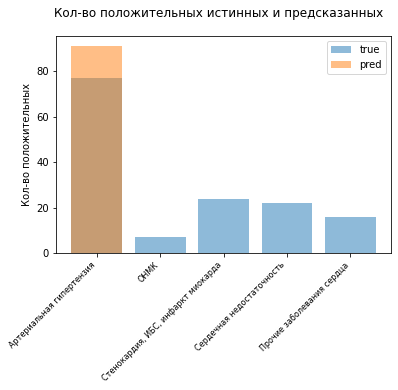

In [310]:
model = ExtraTreesClassifier(random_state=RS, n_estimators=200, max_depth=20)
model.fit(train_data_transformed, train_target)
y_pred = model.predict(train_target_transformed)

evaluate(val_target.to_numpy(), y_pred)
draw_coverage(val_target.to_numpy(), y_pred)

In [311]:
save_model(model, os.path.join(model_path, 'extra_trees.pkl'))

In [312]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [313]:
from catboost import CatBoostClassifier, Pool

In [314]:
cb_train_data = train_data.copy()
cb_train_data['Частота пасс кур'].fillna(cb_train_data['Частота пасс кур'].value_counts().index[0], inplace=True)
cb_train_data[cfg.REAL_COLS] = cb_train_data[cfg.REAL_COLS].astype(str)
pool = Pool(cb_train_data, train_target, cat_features=cfg.CAT_COLS)

cb = CatBoostClassifier(iterations=500, loss_function='MultiLogloss', eval_metric='MultiLogloss',
                            learning_rate=0.03, bootstrap_type='Bayesian', boost_from_average=False,
                            leaf_estimation_iterations=1, leaf_estimation_method='Gradient', 
                            custom_metric=['Recall', 'F1'], silent=True, depth=10, # l2_leaf_reg=2.0,
                            early_stopping_rounds=100,)

cb.fit(pool, verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

recall_common=0.4041, recall_worst=0.0000, f1_common=0.4816, roc_auc=0.6773


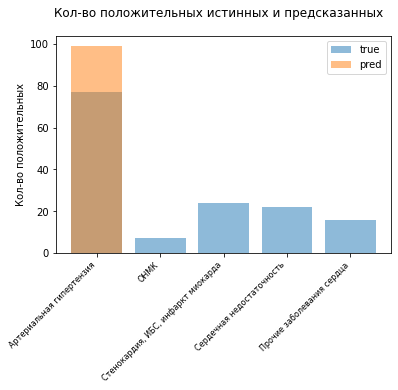

In [315]:
cb_val_data = val_data.copy()
cb_val_data['Частота пасс кур'].fillna(cb_val_data['Частота пасс кур'].value_counts().index[0], inplace=True)
cb_val_data[cfg.REAL_COLS] = cb_val_data[cfg.REAL_COLS].astype(str)
y_pred = cb.predict(cb_val_data)

evaluate(val_target.to_numpy(), y_pred)
draw_coverage(val_target.to_numpy(), y_pred)

In [316]:
save_model(cb, os.path.join(model_path, 'cb.pkl'))

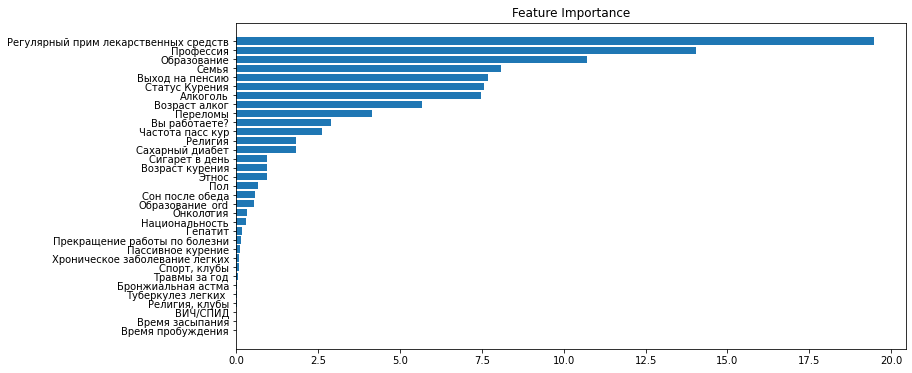

In [317]:
feature_importance = cb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')
plt.show()

In [318]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


(<Figure size 864x576 with 1 Axes>, <AxesSubplot:>)

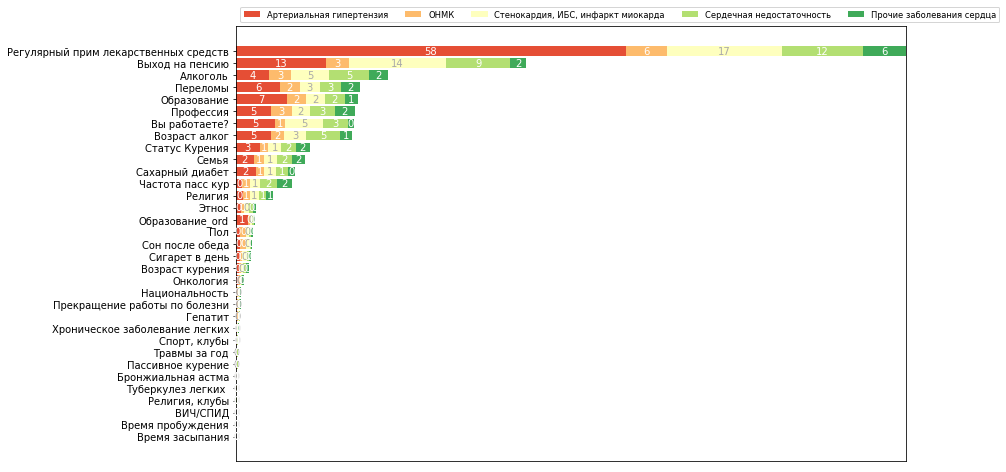

In [319]:
import shap
def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.8,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

explainer = shap.Explainer(cb)
shap_values = explainer(cb_train_data)
shap_importance = shap_values.abs.mean(0).values
results = {i: 100 * j for i, j in zip(train_data.columns, shap_importance)}
results_sorted = {j: results[j] for j in np.take_along_axis(np.array([i for i in results.keys()]), np.argsort(np.array([i for i in results.values()]).sum(axis=1)), 0)[::-1]}

survey(results_sorted, target.columns)

In [320]:
import os
import time
def load_model(path: str):
    return pickle.load(open(path, 'rb'))

model_path = '../models'
report_path = '../reports'
pp = load_model(os.path.join(model_path, 'preproc.pkl'))

In [321]:
processed_data_path = '../data/processed/'
test = pd.read_pickle(os.path.join(processed_data_path, 'test.pkl'))

In [322]:
models_sklearn = [
    'logit',
    'extra_trees',
]

models_cb = [
    'cb',
]

In [323]:
for name in models_sklearn:
    model = load_model(os.path.join(model_path, name + '.pkl'))
    y_pred = model.predict(pp.transform(train))
    pd.DataFrame(y_pred).to_csv(os.path.join(report_path, f'{name}_{time.time()}.csv'))

In [324]:
cb_test = test.copy()
cb_test['Частота пасс кур'].fillna(cb_test['Частота пасс кур'].value_counts().index[0], inplace=True)
cb_test[cfg.REAL_COLS] = cb_test[cfg.REAL_COLS].astype(str)

In [325]:
for name in models_cb:
    model = load_model(os.path.join(model_path, name + '.pkl'))
    y_pred = model.predict(cb_test)
    pd.DataFrame(y_pred).to_csv(os.path.join(report_path, f'{name}_{time.time()}.csv'))